# Supervised Learning Capstone - Used Cars Dataset

For my Supervised Learning Capstone, I decided on a used cars dataset from Kaggle. The dataset contains used car information from Craigslist, which is the world's largest collection of used vehicles for sale. With this dataset, I aim to predict vehicle prices so that after a Craigslist user enters basic information about their vehicle and a suggested sale price would be automatically generated which the seller could accept or alter.

In this notebook, I plan to execute the following outline:
- Data Cleaning
- Data Exploration
- Feature Engineering
- Model Creation
- Performance Evaluation
- Model Selection

Kaggle Dataset: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [23]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from wordcloud import WordCloud
from scipy.stats.mstats import winsorize
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error

# Display preferences
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 2000)

In [24]:
# Create dataframe
cars = pd.read_csv('../../data/vehicles.csv')

## Data Cleaning 

To begin, we'll start by taking a look at the dimensions of this dataset.

In [25]:
print('Number of rows: {}'.format(cars.shape[0]))
print('Number of columns: {}'.format(cars.shape[1]))

Number of rows: 509577
Number of columns: 25


Let's now review the column types and missing values.

In [26]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 25 columns):
id              509577 non-null int64
url             509577 non-null object
region          509577 non-null object
region_url      509577 non-null object
price           509577 non-null int64
year            508050 non-null float64
manufacturer    486813 non-null object
model           501588 non-null object
condition       277643 non-null object
cylinders       309894 non-null object
fuel            505592 non-null object
odometer        417253 non-null float64
title_status    506515 non-null object
transmission    505858 non-null object
vin             302152 non-null object
drive           365434 non-null object
size            167574 non-null object
type            368046 non-null object
paint_color     344871 non-null object
image_url       509563 non-null object
description     509561 non-null object
county          0 non-null float64
state           509577 non-null obj

There are a total of 25 columns in this dataset: 5 are of type float, 2 are of type integer and 18 are of type string.

In [27]:
cars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [28]:
cars.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
509572,7034554007,https://saltlakecity.craigslist.org/ctd/d/engl...,salt lake city,https://saltlakecity.craigslist.org,15476,2012.0,nissan,xterra,NaN,6 cylinders,gas,103135.0,clean,automatic,5N1AN0NW0CC520698,4wd,NaN,SUV,NaN,https://images.craigslist.org/00z0z_3ERBmVoD5s...,Maximum Auto SearchÂ Â Â Â Â Â Â Â STOCK #:Â Â...,NaN,ut,39.6405,-104.961
509573,7034538385,https://saltlakecity.craigslist.org/ctd/d/engl...,salt lake city,https://saltlakecity.craigslist.org,9881,2008.0,bmw,3 series 328i,NaN,6 cylinders,gas,108277.0,clean,automatic,WBAWR33558P150498,rwd,NaN,convertible,NaN,https://images.craigslist.org/01313_38rMiNAW18...,Maximum Auto SearchÂ Â Â Â Â Â Â Â STOCK #:Â Â...,NaN,ut,39.6405,-104.961
509574,7034523643,https://saltlakecity.craigslist.org/ctd/d/salm...,salt lake city,https://saltlakecity.craigslist.org,24895,2019.0,jeep,cherokee,NaN,4 cylinders,gas,6973.0,clean,automatic,1C4PJMLB0KD267506,4wd,NaN,SUV,white,https://images.craigslist.org/00606_dOtGS5RmTi...,"2019 Jeep Cherokee Latitude Plus -- $24,895 ...",NaN,ut,45.1637,-113.894
509575,7034458858,https://saltlakecity.craigslist.org/cto/d/ogde...,salt lake city,https://saltlakecity.craigslist.org,32500,2017.0,NaN,Porsche Macan GTS,excellent,6 cylinders,gas,37520.0,clean,automatic,NaN,NaN,NaN,NaN,red,https://images.craigslist.org/00s0s_32yAwr0KMt...,2017 Porsche Macan GTS Carmine Red w/ Black ...,NaN,ut,41.3112,-111.969
509576,7034389294,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,12900,2012.0,ram,NaN,NaN,NaN,gas,152296.0,clean,automatic,3C6TD5HT1CG309173,4wd,NaN,pickup,black,https://images.craigslist.org/00E0E_3FtnUA2XPT...,"2012 RAM 2500 4WD Crew Cab 169"" ST"" Offere...",NaN,ut,40.3744,-104.694


In [29]:
cars.describe()

,id,price,year,odometer,county,lat,long
count,5.095770e+05,5.095770e+05,508050.000000,4.172530e+05,0.0,499285.000000,499285.000000
mean,7.044176e+09,5.479684e+04,2009.662236,1.017300e+05,NaN,38.453818,-94.313886
std,4.937219e+06,9.575025e+06,8.567953,1.073790e+05,NaN,5.902152,17.717653
min,6.995212e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-82.688100,-165.935000
25%,7.040802e+09,3.995000e+03,2007.000000,4.948800e+04,NaN,34.557400,-108.506000
50%,7.045325e+09,9.377000e+03,2011.000000,9.489400e+04,NaN,39.145300,-88.678800
75%,7.048556e+09,1.795500e+04,2015.000000,1.387780e+05,NaN,42.449000,-81.111400
max,7.050103e+09,3.600029e+09,2021.000000,1.000000e+07,NaN,81.569300,94.124800


In [30]:
cars.describe(include=['O'])

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,state
count,509577,509577,509577,486813,501588,277643,309894,505592,506515,505858,302152,365434,167574,368046,344871,509563,509561,509577
unique,509577,403,413,43,35852,6,8,5,6,3,180145,3,4,13,12,349468,427803,51
top,https://asheville.craigslist.org/ctd/d/morgant...,fayetteville,https://modesto.craigslist.org,ford,f-150,excellent,6 cylinders,gas,clean,automatic,WDC0G4JB4HF164180,4wd,full-size,sedan,white,https://images.craigslist.org/00i0i_ChcqziILO2...,CLEAN TITLE NO ACCEDINTS 3 YEARS WARRANTY D...,ca
freq,1,4501,2992,92601,11341,140663,111940,441688,487040,457659,114,170482,90481,93225,89322,167,160,52780


## Missing Values and Outliers

I summed up the missing values so we can see the total number for each variable.

In [31]:
# Missing values for each variable
cars.isnull().sum().sort_values()

id                   0
url                  0
region               0
region_url           0
price                0
state                0
image_url           14
description         16
year              1527
title_status      3062
transmission      3719
fuel              3985
model             7989
lat              10292
long             10292
manufacturer     22764
odometer         92324
type            141531
drive           144143
paint_color     164706
cylinders       199683
vin             207425
condition       231934
size            342003
county          509577
dtype: int64

I would also like to show what the percentage of missing values for each variable.

In [32]:
# Percentage of missing values for each variable
round((cars.isnull().sum() / len(cars)) * 100, 4).sort_values()

id                0.0000
url               0.0000
region            0.0000
region_url        0.0000
price             0.0000
state             0.0000
image_url         0.0027
description       0.0031
year              0.2997
title_status      0.6009
transmission      0.7298
fuel              0.7820
model             1.5678
lat               2.0197
long              2.0197
manufacturer      4.4672
odometer         18.1178
type             27.7742
drive            28.2868
paint_color      32.3221
cylinders        39.1860
vin              40.7053
condition        45.5150
size             67.1151
county          100.0000
dtype: float64

In [33]:
# Drop id, url, region_url, image_url, county and vin
cars = cars.drop(['id', 'url', 'region_url', 'image_url', 'county', 'vin'], axis=1)

# Drop rows
cars = cars.dropna(subset=['description'])

I decided to drop ```url```, ```region_url``` and ```image_url``` from the dataset because the URLs don't add any value. In addition, ```id```, ```county``` and ```vin``` were removed. ```county``` only contains missing values and ```id``` and ```vin``` are unique identifiers that don't add any value to the target variable.

I also removed records with missing values from ```description```.

In [34]:
# Boolean series
zero_price = cars[cars['price'] == 0]

# Drop rows
cars = cars.drop(zero_price.index, axis=0)

Remove rows with price of 0.

In [35]:
# Print unique values, number of unique values and value frequency details
def variable_details(column):
    print('There are {} missing values in {}\n'.format(cars[column].isnull().sum(), column))
    print('The are {} unique values in {}\n'.format(cars[column].nunique(), column))
    print('The unique values are \n{}\n'.format(cars[column].unique()))
    print('The value frequency is \n{}'.format(cars[column].value_counts()))

I created the ```variable_details``` function to print out number of missing values, unique values, number of unique values and value frequency for each column.

### Modifications to ```description```

The ```description``` field contains a lot of information about the vehicle, but is composed of more free-form text. In some cases, I used ```description``` to populate missing values for ```manufacturer```, ```odometer``` and ```type```. After reviewing many of the records for ```description```, I decided to implement the following transformation for the data cleaning that follows. 

In [36]:
# Retrieve special characters from description field
special_characters = set()

for desc in cars['description']:
    for char in desc:
        if not char.isalpha():
            if not char.isdecimal():
                special_characters.add(char)

In [37]:
# Remove some of special characters from description field
def transform_description(description):
    desc_words = description.split(' ')
    new_words = []
    for word in desc_words:
        for special in special_characters:
            word = word.strip(special)
        new_words.append(word)
        
    new_desc = ' '.join(new_words)

    return new_desc

In [38]:
# Transform description field before handling missing values
cars['description'] = cars['description'].apply(transform_description)

In [39]:
# Identify nulls for specific columns
wc_nulls = cars[cars[['manufacturer', 'odometer', 'type']].isnull().any(axis=1)]

In [40]:
print('There are {} rows in wc_nulls'.format(len(wc_nulls)))

There are 167861 rows in wc_nulls


In [41]:
def wc_creation(description):
    try:
        wc = WordCloud().generate(str(description)[:1000])
        return 'Pass'
    except:
        return 'Fail'

Before using ```description``` to populate ```manufacturer```, ```odometer``` and ```type```, I am using the function above to verify a word cloud object can be created. 

```wc_nulls['wc'] = wc_nulls['description'].map(wc_creation)```

This code snippet took an extremely long time to execute so I created a list with hard coded values (indexes) that 'Fail' and dropped them from the main dataframe.

In [43]:
wc_errors = [33359, 159409, 163763, 176537, 225058, 225542, 225544, 225549, 225551, 225552, 350611, 351453, 419837]

cars = cars.drop(wc_errors, axis=0)

### Missing values for ```year```

In [44]:
# Print out variable details
variable_details('year')

There are 1497 missing values in year

The are 113 unique values in year

The unique values are 
[2012. 2015. 2018. 2009. 2017. 2007. 2013. 1994. 2004. 2014. 2002. 2003.
 2019. 2010. 2008. 2001.   nan 2016. 1992. 2011. 1999. 1935. 2006. 2005.
 1981. 1950. 1955. 1977. 2000. 1951. 1998. 1986. 1995. 1997. 1993. 1991.
 1969. 2020. 1964. 1970. 1980. 1972. 1978. 1990. 1983. 1996. 1971. 1966.
 1988. 1952. 1943. 1940. 1956. 1982. 1987. 1959. 1958. 1973. 1948. 1976.
 1984. 1960. 1954. 1962. 1942. 1989. 1968. 1979. 1985. 1965. 1967. 1963.
 1939. 1953. 1929. 1974. 1949. 1917. 1947. 1932. 1975. 1946. 1957. 1931.
 1961. 1937. 1941. 1938. 1936. 1928. 1934. 1933. 1900. 2021. 1926. 1923.
 1919. 1930. 1920. 1927. 1901. 1902. 1925. 1918. 1912. 1922. 1924. 1945.
 1914. 1916. 1911. 1915. 1944. 1903.]

The value frequency is 
2016.0    35640
2015.0    32999
2014.0    31831
2013.0    31603
2012.0    30404
2017.0    28739
2011.0    28583
2008.0    27035
2007.0    24886
2010.0    22522
2006.0    21222
2018.0 

In [45]:
# Print out variable descriptive statistics
cars['year'].describe()

count    464472.000000
mean       2009.334108
std           8.724671
min        1900.000000
25%        2006.000000
50%        2011.000000
75%        2015.000000
max        2021.000000
Name: year, dtype: float64

In [46]:
# Investigate minimum value
cars[cars['year'] == 1900]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long
36150,eau claire,1,1900.0,NaN,ASK TOM DAUPHIN,NaN,NaN,diesel,NaN,clean,other,NaN,NaN,NaN,NaN,We have Large inventory of certified TDI diese...,wi,NaN,NaN
37497,green bay,1,1900.0,NaN,ASK FOR TOM DAUPHIN,excellent,NaN,diesel,NaN,clean,other,NaN,NaN,NaN,NaN,We have Large inventory of certified TDI diese...,wi,43.0668,-88.1469
44828,milwaukee,1,1900.0,NaN,ASK TOM DAUPHIN,excellent,NaN,diesel,NaN,clean,other,NaN,NaN,NaN,NaN,We have Large inventory of certified TDI diese...,wi,43.0668,-88.1469
135695,denver,15800,1900.0,jeep,wrangler unlimited sahara,excellent,6 cylinders,gas,126000.0,clean,automatic,4wd,NaN,NaN,orange,2009 jeep wrangler unlimited sahara non smokin...,co,39.6667,-105.0850
172538,orlando,10000,1900.0,NaN,..,NaN,NaN,other,NaN,clean,other,NaN,NaN,NaN,NaN,We buy all kinds of cars even recreational veh...,fl,28.1984,-81.4870
197007,valdosta,10899,1900.0,honda,cr-v ex used suv,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,2011 Honda CR-V EX USED SUV Hundreds of NEW ...,ga,29.8135,-82.4720
216206,rockford,1,1900.0,NaN,ASK FOR TOM DAUPHIN,excellent,NaN,diesel,NaN,clean,other,NaN,NaN,NaN,NaN,We have Large inventory of certified TDI diese...,il,43.0668,-88.1469
240181,waterloo / cedar falls,65,1900.0,NaN,0,NaN,NaN,other,NaN,clean,other,NaN,NaN,NaN,NaN,STORAGE FOR RENT SPECIAL 65.00 A MONTH 10/20 ...,ia,42.5391,-92.3376
375986,long island,1,1900.0,NaN,ANY,good,other,other,158100.0,clean,other,rwd,full-size,truck,custom,We have qualified customers waiting to purchas...,ny,40.7649,-73.2924
393384,chillicothe,2000,1900.0,NaN,international dt466,NaN,NaN,diesel,NaN,clean,other,NaN,NaN,NaN,NaN,Several trucks from our old fleet Freezer unit...,oh,39.0648,-83.0165


In [47]:
# Investigate maximum value
cars[cars['year'] == 2021]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long
39197,janesville,1,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
39213,janesville,1,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
39219,janesville,1,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
39232,janesville,150,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
39234,janesville,1,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
39235,janesville,300,2021.0,NaN,Beloit,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,1 year old Purebred German shepherd High ener...,wi,42.5620,-89.0860
39241,janesville,800,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
39243,janesville,800,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
41905,madison,1,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
41920,madison,150,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025


In [48]:
# Create dataframes
cars_1900 = cars[cars['year'] == 1900]
cars_2021 = cars[cars['year'] == 2021]

# Remove 1900 and 2021 rows
cars.drop(cars_1900.index, inplace=True)
cars.drop(cars_2021.index, inplace=True)

In [49]:
# Create missing values boolean series
cars_year_nulls = cars['year'].isnull()

In [50]:
# If first character of description is '2', then the addition of three trailing characters represent year
def populate_year(description):
    desc_slice = str(description)[0]

    if desc_slice == '2':
        year = str(description)[:4]
        return float(year)

In [51]:
# Replace missing values with year from description column
cars.loc[cars_year_nulls, 'year'] = cars.loc[cars_year_nulls, 'description'].apply(populate_year)

In [52]:
# Total number of missing values
cars['year'].isnull().sum()

11

In [53]:
# Fill remaining missing values with mean
cars['year'] = cars['year'].fillna(cars['year'].mean())

### Missing values for ```title_status```

In [54]:
# Print out variable details
variable_details('title_status')

There are 2885 missing values in title_status

The are 6 unique values in title_status

The unique values are 
['clean' 'rebuilt' 'salvage' 'lien' nan 'missing' 'parts only']

The value frequency is 
clean         443719
rebuilt        10387
salvage         5296
lien            2841
missing          589
parts only       218
Name: title_status, dtype: int64


In [55]:
# Populate missing values using 'missing' categorical value
cars['title_status'] = cars['title_status'].fillna('missing')

### Missing values for ```transmission```

In [56]:
# Print out variable details
variable_details('transmission')

There are 3219 missing values in transmission

The are 3 unique values in transmission

The unique values are 
['manual' 'automatic' 'other' nan]

The value frequency is 
automatic    417429
manual        32307
other         12980
Name: transmission, dtype: int64


In [57]:
# Populate missing values using 'other' categorical value
cars.transmission = cars.transmission.fillna('other')

### Missing values for ```fuel```

In [58]:
# Print out variable details
variable_details('fuel')

There are 3755 missing values in fuel

The are 5 unique values in fuel

The unique values are 
['gas' 'diesel' 'other' nan 'electric' 'hybrid']

The value frequency is 
gas         405233
diesel       38876
other        13720
hybrid        3690
electric       661
Name: fuel, dtype: int64


In [59]:
# Populate missing values using 'other' categorical value
cars['fuel'].fillna('other', inplace=True)

### Missing values for ```lat``` and ```long```

In [60]:
# Print out variable details
variable_details('region')

There are 0 missing values in region

The are 403 unique values in region

The unique values are 
['salt lake city' 'st george' 'vermont' 'norfolk / hampton roads'
 'richmond' 'charlottesville' 'roanoke' 'danville' 'fredericksburg'
 'bellingham' 'harrisonburg' 'lynchburg' 'kennewick-pasco-richland'
 'new river valley' 'moses lake' 'southwest VA' 'winchester'
 'olympic peninsula' 'seattle-tacoma' 'skagit / island / SJI' 'wenatchee'
 "spokane / coeur d'alene" 'madison' 'milwaukee' 'yakima' 'charleston'
 'green bay' 'kenosha-racine' 'eastern panhandle' 'morgantown'
 'southern WV' 'west virginia (old)' 'appleton-oshkosh-FDL' 'eau claire'
 'duluth / superior' 'la crosse' 'janesville' 'wausau' 'wyoming'
 'northern WI' 'sheboygan' 'gadsden-anniston' 'birmingham'
 'huntsville / decatur' 'dothan' 'phoenix' 'little rock'
 'anchorage / mat-su' 'mobile' 'montgomery' 'tuscaloosa' 'auburn'
 'flagstaff / sedona' 'mohave county' 'florence / muscle shoals' 'tucson'
 'fairbanks' 'kenai peninsula' 'south

In [61]:
# Print out variable details
variable_details('lat')

There are 5409 missing values in lat

The are 50810 unique values in lat

The unique values are 
[40.7372 40.5881 40.3744 ... 40.758  38.8787 41.3112]

The value frequency is 
43.1824    2338
47.6561    2120
40.4688    2077
46.2348    2000
33.7865    1814
           ... 
37.7797       1
33.5116       1
41.6890       1
41.6709       1
40.0853       1
Name: lat, Length: 50810, dtype: int64


In [62]:
# Print out variable details
variable_details('long')

There are 5409 missing values in long

The are 50756 unique values in long

The unique values are 
[-111.858 -111.884 -104.694 ... -115.226 -111.625 -111.97 ]

The value frequency is 
-84.1122     2338
-117.2370    2120
-74.2817     2077
-119.1280    2000
-84.4454     1813
             ... 
-127.4650       1
-81.5246        1
-159.3860       1
-85.0781        1
-78.9648        1
Name: long, Length: 50756, dtype: int64


In [63]:
# Retrieve region mean for latitude and longitude
region_mean = cars.groupby(['region'])[['lat', 'long']].mean()
region_mean

,lat,long
region,,
SF bay area,37.667082,-121.558874
abilene,32.271560,-96.444940
akron / canton,40.983722,-81.539221
albany,42.323677,-74.174840
albuquerque,35.292214,-106.309201
altoona-johnstown,40.400644,-78.674503
amarillo,34.949030,-101.344200
ames,41.812160,-93.111723
anchorage / mat-su,61.056193,-149.426766


In [64]:
# Create region mean lookup dictionary
region_mean_lookup = region_mean.to_dict('index')
region_mean_lookup

{'SF bay area': {'lat': 37.66708207282918, 'long': -121.55887366946676},
 'abilene': {'lat': 32.2715602036199, 'long': -96.44493981900453},
 'akron / canton': {'lat': 40.98372203856734, 'long': -81.53922103994528},
 'albany': {'lat': 42.32367652899094, 'long': -74.17483999205724},
 'albuquerque': {'lat': 35.29221380238363, 'long': -106.30920149942399},
 'altoona-johnstown': {'lat': 40.40064394463673, 'long': -78.67450311418698},
 'amarillo': {'lat': 34.94902979482586, 'long': -101.34419973238195},
 'ames': {'lat': 41.81216042553196, 'long': -93.11172297872339},
 'anchorage / mat-su': {'lat': 61.05619342149845, 'long': -149.42676642929672},
 'ann arbor': {'lat': 42.52088538461535, 'long': -83.85550681318695},
 'annapolis': {'lat': 38.811602173913016, 'long': -76.39265186335406},
 'appleton-oshkosh-FDL': {'lat': 44.133549576669616,
  'long': -88.61671594543718},
 'asheville': {'lat': 35.33904116684281, 'long': -82.64135475184781},
 'ashtabula': {'lat': 41.70146029411766, 'long': -81.2321

In [65]:
# Create list of row indexes for rows with a missing value for latitude
lat_nulls = cars[cars['lat'].isnull()].index.tolist()

In [66]:
# Create list of row indexes for rows with a missing value for longitude
long_nulls = cars[cars['long'].isnull()].index.tolist()

In [67]:
# Comparing latitude-longitude row indexes to verify lat-long pair is null
def lat_long_combination(lat, long):
    
    print('Latitude length is {}'.format(len(lat)))
    print('Longitude length is {}'.format(len(long)))
    
    # Counter
    is_not_valid = 0

    # Loop through lat elements
    for i in range(len(lat)):
        
        # Lat value doesn't equal long value increment counter
        if lat[i] != long[i]:
            is_not_valid += 1
            
    print('There were {} invalid combinations found'.format(str(is_not_valid)))

In [68]:
lat_long_combination(lat_nulls, long_nulls)

Latitude length is 5409
Longitude length is 5409
There were 0 invalid combinations found


In [69]:
# Update latitude missing value with region mean
def retrieve_lat(region):
    latitude = region_mean_lookup[region]['lat']
    return latitude

In [70]:
# Update longitude missing value with region mean
def retrieve_long(region):
    longitude = region_mean_lookup[region]['long']
    return longitude

In [71]:
# Retrieving row indexes lat-long null pairs
cars_lat_long = cars[cars[['lat', 'long']].isnull().any(axis=1)]

In [72]:
# Loop through row indexes and update latitude and longitude values
for i in cars_lat_long.index:
    cars['lat'][i] = retrieve_lat(cars['region'][i])
    cars['long'][i] = retrieve_long(cars['region'][i])

### Missing values for ```manufacturer```

In [73]:
# Print out variable details
variable_details('manufacturer')

There are 20943 missing values in manufacturer

The are 43 unique values in manufacturer

The unique values are 
['volkswagen' 'gmc' 'ford' 'ram' 'toyota' 'chevrolet' 'mercedes-benz'
 'jeep' nan 'honda' 'lexus' 'cadillac' 'dodge' 'hyundai' 'subaru' 'bmw'
 'chrysler' 'nissan' 'mitsubishi' 'acura' 'kia' 'rover' 'alfa-romeo'
 'mazda' 'saturn' 'pontiac' 'volvo' 'jaguar' 'fiat' 'audi' 'mini'
 'infiniti' 'lincoln' 'buick' 'mercury' 'harley-davidson' 'tesla' 'porche'
 'land rover' 'ferrari' 'datsun' 'hennessey' 'aston-martin' 'morgan']

The value frequency is 
ford               84726
chevrolet          67605
toyota             35019
honda              23780
ram                23779
nissan             23561
jeep               21764
gmc                21118
dodge              17094
bmw                12493
mercedes-benz      10807
hyundai            10566
subaru              9690
volkswagen          9497
chrysler            8061
kia                 7735
cadillac            6713
lexus          

In [74]:
# Couple minor replacements
cars['manufacturer'] = cars['manufacturer'].replace('mercedes-benz', 'mercedes')
cars['manufacturer'] = cars['manufacturer'].replace('porche', 'porsche')

In [75]:
# Create list of unique values
unique_list = cars['manufacturer'].unique().tolist()

In [76]:
# Look for manufacturer in description and if found update manufacturer
def populate_manufacturer(description):

    # Create word cloud object
    wc = WordCloud().generate(str(description)[:1000])
    
    # Create a list of keys from word cloud object
    keys = [key.lower() for key in wc.words_.keys()]
    
    # If unique value is found return unique value
    for unique in unique_list:
        if unique in keys:
            return unique

In [77]:
# Create missing values boolean series
cars_manu_nulls = cars['manufacturer'].isnull()

In [78]:
# Update missing values in manufacturer with value from description
cars.loc[cars_manu_nulls, 'manufacturer'] = cars.loc[cars_manu_nulls, 'description'].apply(populate_manufacturer)

In [79]:
# Total number of missing values
cars.manufacturer.isnull().sum()

13303

In [80]:
# Remove remaining rows with missing values
cars = cars.dropna(subset=['manufacturer'])

### Missing values for ```odometer```

In [81]:
# Print out variable details
variable_details('odometer')

There are 77359 missing values in odometer

The are 112170 unique values in odometer

The unique values are 
[63500.  7554. 70150. ... 15255. 39457.  6973.]

The value frequency is 
0.0         1186
150000.0    1118
140000.0    1112
130000.0    1071
160000.0    1015
            ... 
185127.0       1
92562.0        1
108225.0       1
185122.0       1
94341.0        1
Name: odometer, Length: 112170, dtype: int64


In [82]:
# Print out variable descriptive statistics
cars['odometer'].describe()

count    3.752730e+05
mean     1.032234e+05
std      1.033333e+05
min      0.000000e+00
25%      5.200000e+04
50%      9.701300e+04
75%      1.403800e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [83]:
# Look for odometer in description and if found update odometer
def populate_odometer(description):

    # Create word cloud object
    wc = WordCloud().generate(str(description)[:1000])
    
    # Create a list of keys from word cloud object
    keys = [key.lower() for key in wc.words_.keys()]

    for key in keys:
        if re.search('^[0-9][0-9][0-9]k$', key) or re.search('^[0-9][0-9]k$', key) or re.search('^[0-9]k$', key):
            return float(key.replace('k', '000'))
    

In [84]:
# Create missing values boolean series
cars_odom_nulls = cars['odometer'].isnull()

In [85]:
# Update missing values in odometer with value from description
cars.loc[cars_odom_nulls, 'odometer'] = cars.loc[cars_odom_nulls, 'description'].apply(populate_odometer)

In [86]:
# Total number of missing values
cars.odometer.isnull().sum()

56486

In [87]:
# Remove remaining rows with missing values
cars = cars.dropna(subset=['odometer'])

### Missing values for ```type```

In [88]:
# Print out variable details
variable_details('type')

There are 88190 missing values in type

The are 13 unique values in type

The unique values are 
['hatchback' nan 'pickup' 'SUV' 'sedan' 'truck' 'wagon' 'van' 'coupe'
 'convertible' 'other' 'offroad' 'mini-van' 'bus']

The value frequency is 
sedan          78206
SUV            77463
pickup         43605
truck          39843
coupe          15353
hatchback      10865
other          10533
wagon           9593
van             9061
mini-van        6219
convertible     6180
offroad          536
bus              499
Name: type, dtype: int64


In [89]:
# Create list of unique type values
cars_type = cars['type'].unique().tolist()

In [90]:
# Look for type in description and if found update type
def populate_type(description):

    # Create word cloud object
    wc = WordCloud().generate(str(description)[:1000])
    
    # Create a list of keys from word cloud object
    keys = [key.lower() for key in wc.words_.keys()]

    # If unique value is found return unique value
    for unique in cars_type:
        if unique in keys:
            return unique

In [91]:
# Create missing values boolean series
cars_type_nulls = cars['type'].isnull()

In [92]:
# Update missing values in odometer with value from description
cars.loc[cars_type_nulls, 'type'] = cars.loc[cars_type_nulls, 'description'].apply(populate_type)

In [93]:
# Total number of missing values
cars.type.isnull().sum()

62094

In [94]:
# Remove remaining rows with missing values
cars = cars.dropna(subset=['type'])

### Missing values for ```drive```

In [95]:
# Print out variable details
variable_details('drive')

There are 55729 missing values in drive

The are 3 unique values in drive

The unique values are 
['4wd' nan 'fwd' 'rwd']

The value frequency is 
4wd    131549
fwd     96557
rwd     50217
Name: drive, dtype: int64


In [96]:
# Populate missing values using 'missing'
cars['drive'] = cars['drive'].fillna('unknown')

### Missing values for ```paint_color```

In [97]:
# Print out variable details
variable_details('paint_color')

There are 65815 missing values in paint_color

The are 12 unique values in paint_color

The unique values are 
['black' 'white' 'silver' nan 'brown' 'blue' 'grey' 'red' 'custom'
 'purple' 'yellow' 'green' 'orange']

The value frequency is 
white     69183
black     54813
silver    40302
blue      26821
red       26323
grey      26277
custom     7715
green      6947
brown      6049
yellow     1710
orange     1483
purple      614
Name: paint_color, dtype: int64


In [98]:
# Populate missing values using 'other'
cars['paint_color'] = cars['paint_color'].fillna('unknown')

### Missing values for ```cylinders```

In [99]:
# Print out variable details
variable_details('cylinders')

There are 102046 missing values in cylinders

The are 8 unique values in cylinders

The unique values are 
['4 cylinders' nan '8 cylinders' '6 cylinders' '10 cylinders'
 '5 cylinders' '3 cylinders' '12 cylinders' 'other']

The value frequency is 
6 cylinders     84485
8 cylinders     71789
4 cylinders     70718
10 cylinders     1995
5 cylinders      1900
other             687
3 cylinders       356
12 cylinders       76
Name: cylinders, dtype: int64


In [100]:
# Populate missing values using 'other' categorical value
cars['cylinders'] = cars['cylinders'].fillna('other')

### Missing values for ```condition```

In [101]:
# Print out variable details
variable_details('condition')

There are 130160 missing values in condition

The are 6 unique values in condition

The unique values are 
['excellent' nan 'good' 'like new' 'fair' 'new' 'salvage']

The value frequency is 
excellent    101830
good          75659
like new      19247
fair           6076
new             677
salvage         403
Name: condition, dtype: int64


In [102]:
# Populate missing values using 'unknown'
cars['condition'] = cars['condition'].fillna('unknown')

### Missing values for ```model``` and ```size```

In [103]:
# Print out variable details
variable_details('model')

There are 3837 missing values in model

The are 24155 unique values in model

The unique values are 
['golf r' 'sierra 1500' 'f-450' ... 'm6 euro' 'c7500 chipper bucket truck'
 'grand caravan se fwd']

The value frequency is 
f-150                    8264
silverado 1500           5160
1500                     5151
silverado                3667
2500                     3413
                         ... 
acadia slt1 awd             1
zephyr 4dr sedan            1
miata m-edition             1
mustang pony package        1
model s 90d autopilot       1
Name: model, Length: 24155, dtype: int64


In [104]:
# Print out variable details
variable_details('size')

There are 199049 missing values in size

The are 4 unique values in size

The unique values are 
['compact' nan 'mid-size' 'full-size' 'sub-compact']

The value frequency is 
full-size      73636
mid-size       38167
compact        20048
sub-compact     3152
Name: size, dtype: int64


Due to the number of unique values in ```model``` and the number of missing values in ```size``` along with some of the characteristics from ```model``` and ```size``` being represented by ```type``` (for example, coupe and compact along with SUV and full-size are very similar), I decided to drop ```model``` and ```size```.

In [105]:
cars = cars.drop(['model', 'size'], axis=1)

In [106]:
# Missing values for each variable
cars.isnull().sum().sort_values()

region          0
state           0
description     0
paint_color     0
type            0
drive           0
transmission    0
lat             0
title_status    0
fuel            0
cylinders       0
condition       0
manufacturer    0
year            0
price           0
odometer        0
long            0
dtype: int64

As we can see, there are no longer any null values in the ```cars``` dataframe.

### Outliers 

In [107]:
def outlier_visual(column, name):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.boxplot(column)
    plt.title('{} Boxplot'.format(name))
    
    plt.subplot(1, 2, 2)
    plt.hist(column)
    plt.title('{} Histogram'.format(name))
    
    plt.show()

### Outliers for ```price``` 

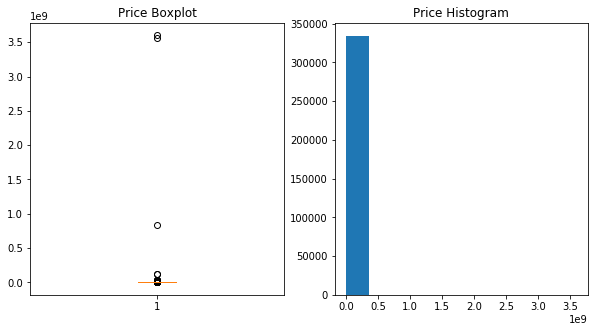

In [108]:
outlier_visual(cars['price'], 'Price')

### Outliers for ```year``` 

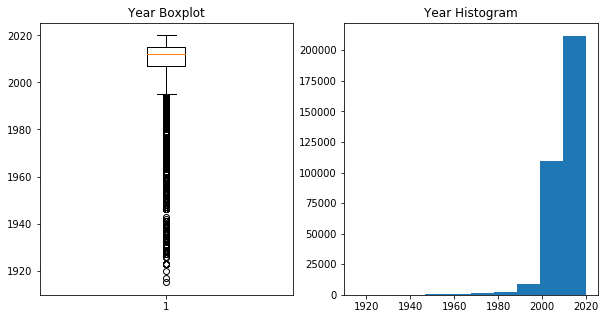

In [109]:
outlier_visual(cars['year'], 'Year')

### Outliers for ```odometer``` 

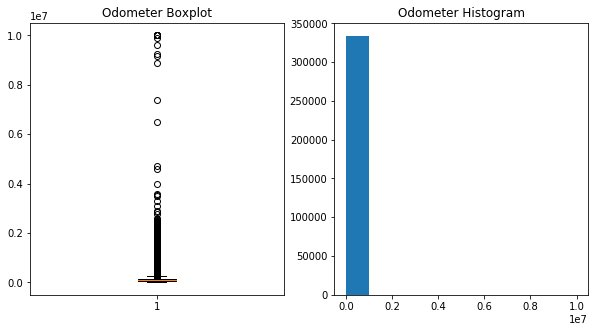

In [110]:
outlier_visual(cars['odometer'], 'Odometer')

### Outliers for ```lat``` 

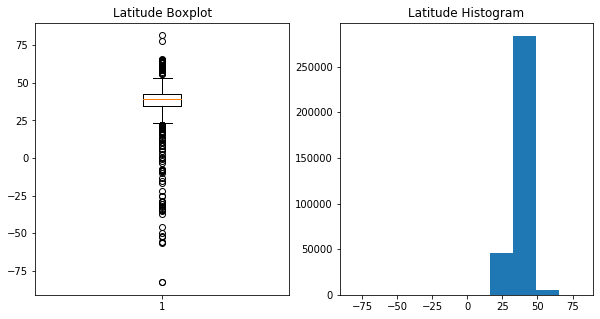

In [111]:
outlier_visual(cars['lat'], 'Latitude')

### Outliers for ```long``` 

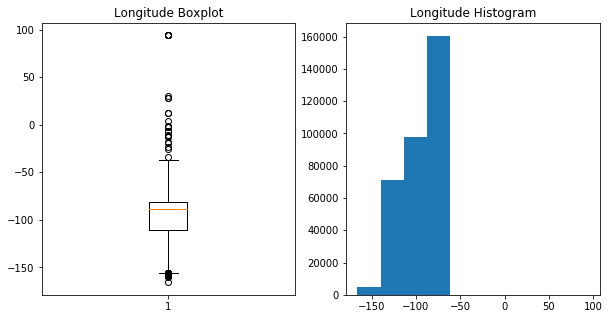

In [112]:
outlier_visual(cars['long'], 'Longitude')

### Handling Outliers with Winsorization

In [113]:
# Limit outliers through winsorization
price_winsor = winsorize(cars['price'], (0, 0.04))
year_winsor = winsorize(cars['year'], (0.04, 0))
odometer_winsor = winsorize(cars['odometer'], (0, 0.03))
lat_winsor = winsorize(cars['lat'], (0.01, 0.01))
long_winsor = winsorize(cars['long'], (0.02, 0.01))

### Winsorization for ```price``` 

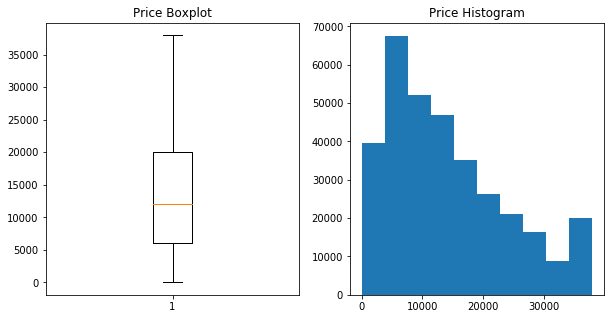

In [114]:
outlier_visual(price_winsor, 'Price')

### Winsorization for ```year``` 

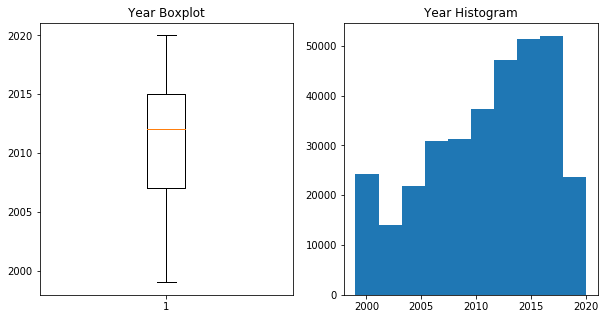

In [115]:
outlier_visual(year_winsor, 'Year')

### Winsorization for ```odometer``` 

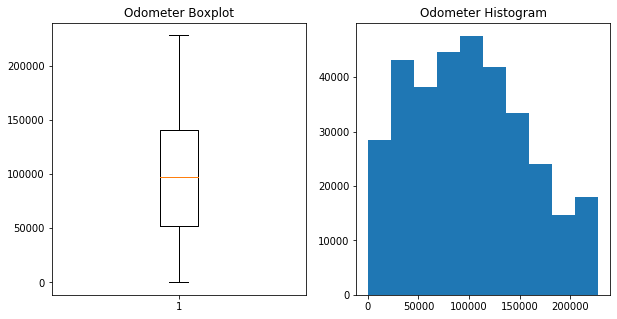

In [116]:
outlier_visual(odometer_winsor, 'Odometer')

### Winsorization for ```latitude``` 

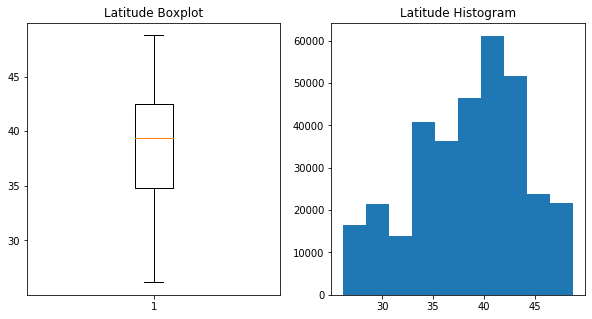

In [117]:
outlier_visual(lat_winsor, 'Latitude')

### Winsorization for ```longitude``` 

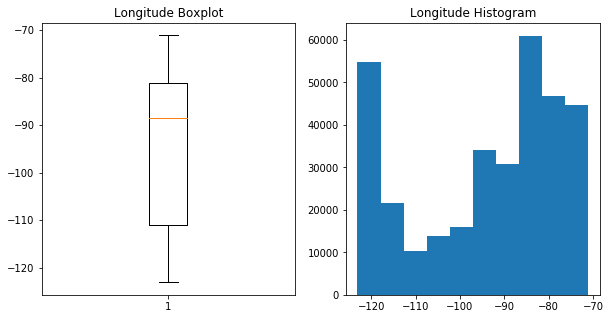

In [118]:
outlier_visual(long_winsor, 'Longitude')

In [119]:
# Add winsorized variables to dataset
cars['price_winsor'] = price_winsor
cars['year_winsor'] = year_winsor
cars['odometer_winsor'] = odometer_winsor
cars['lat_winsor'] = lat_winsor
cars['long_winsor'] = long_winsor

## Data Exploration and Feature Engineering 

#### Continuous Variables 

After executing data visualization above, I am showing the descriptive statistics as part of univariate analysis for each continuous variable.

In [120]:
cars[['price', 'year', 'odometer', 'lat', 'long', 'price_winsor', 'year_winsor', 'odometer_winsor', 
      'lat_winsor', 'long_winsor']].describe()

,price,year,odometer,lat,long,price_winsor,year_winsor,odometer_winsor,lat_winsor,long_winsor
count,3.340520e+05,334052.000000,3.340520e+05,334052.000000,334052.000000,334052.000000,334052.000000,334052.000000,334052.000000,334052.000000
mean,4.059196e+04,2010.392537,1.033695e+05,38.633516,-94.521272,14192.546196,2010.810727,100286.556734,38.555825,-94.104519
std,8.893133e+06,7.030129,9.991163e+04,5.868595,17.931347,9910.445456,5.347861,58149.463498,5.404495,16.812766
min,1.000000e+00,1915.000000,0.000000e+00,-82.688100,-165.935000,1.000000,1999.000000,0.000000,26.138900,-123.128000
25%,6.000000e+03,2007.000000,5.212375e+04,34.802400,-110.978000,6000.000000,2007.000000,52123.750000,34.802400,-110.978000
50%,1.199500e+04,2012.000000,9.700000e+04,39.364700,-88.527900,11995.000000,2012.000000,97000.000000,39.364700,-88.527900
75%,1.999000e+04,2015.000000,1.404400e+05,42.484500,-81.179600,19990.000000,2015.000000,140440.000000,42.484500,-81.179600
max,3.600029e+09,2020.000000,1.000000e+07,81.569300,94.124800,37959.000000,2020.000000,228000.000000,48.781700,-71.102600


#### Categorical Variables 

In [121]:
def categorical_visual(column):
    plt.figure(figsize=(20, 10))
    plt.barh(cars.groupby(column)[column].count().index,
             cars.groupby(column)[column].count())
    plt.title('Horizontal bar chart for {}'.format(column))
    plt.show()

In [122]:
# Create a list of categorical variables excluding description
categorical = []

for column in cars.columns:
    
    if cars[column].dtype == 'object' and column != 'description':
        categorical.append(column)
        
categorical

['region',
 'manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state']

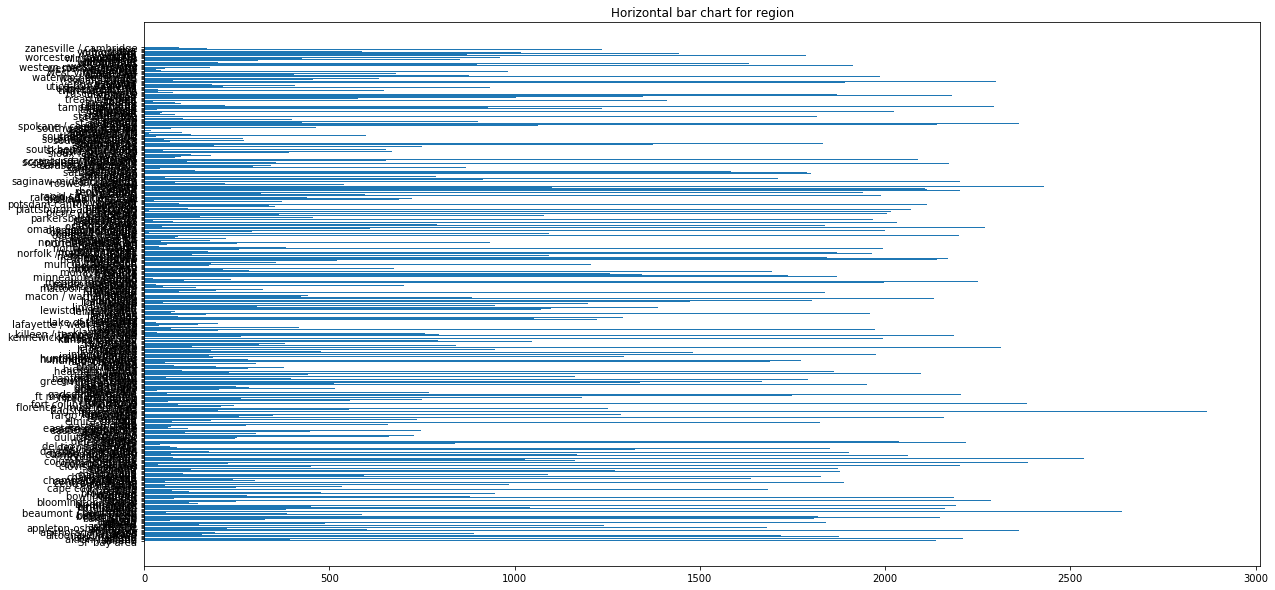

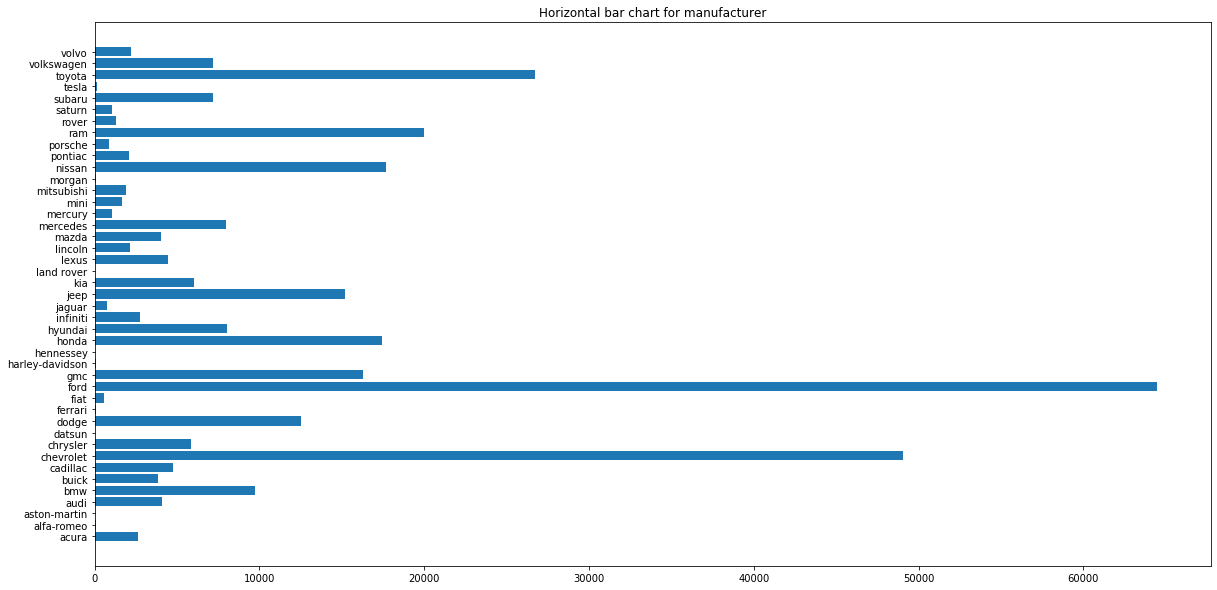

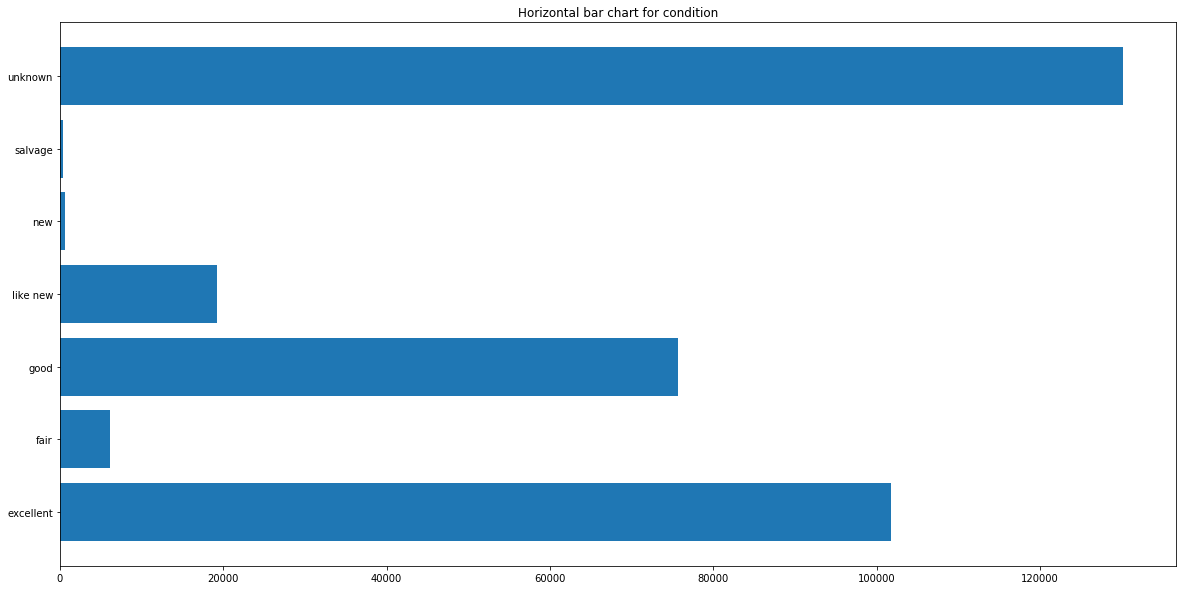

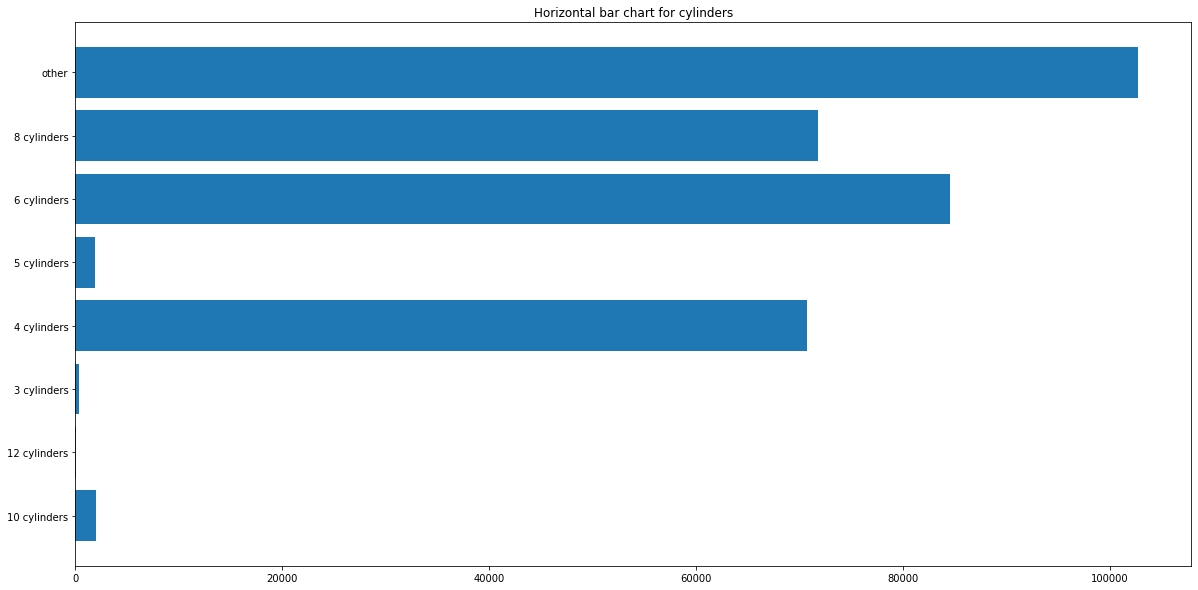

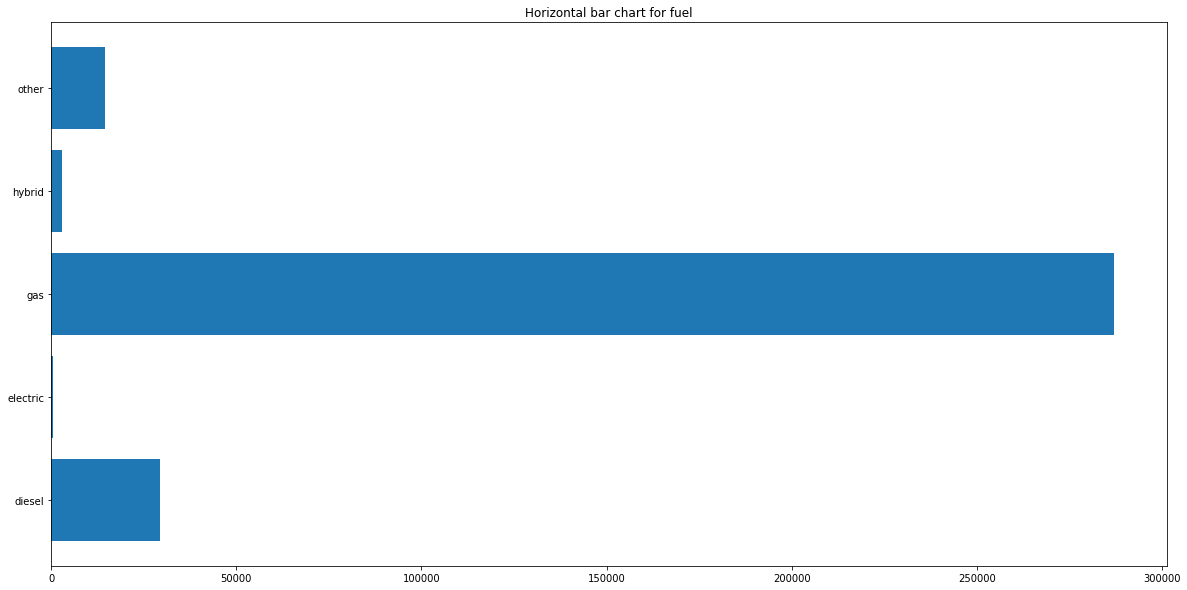

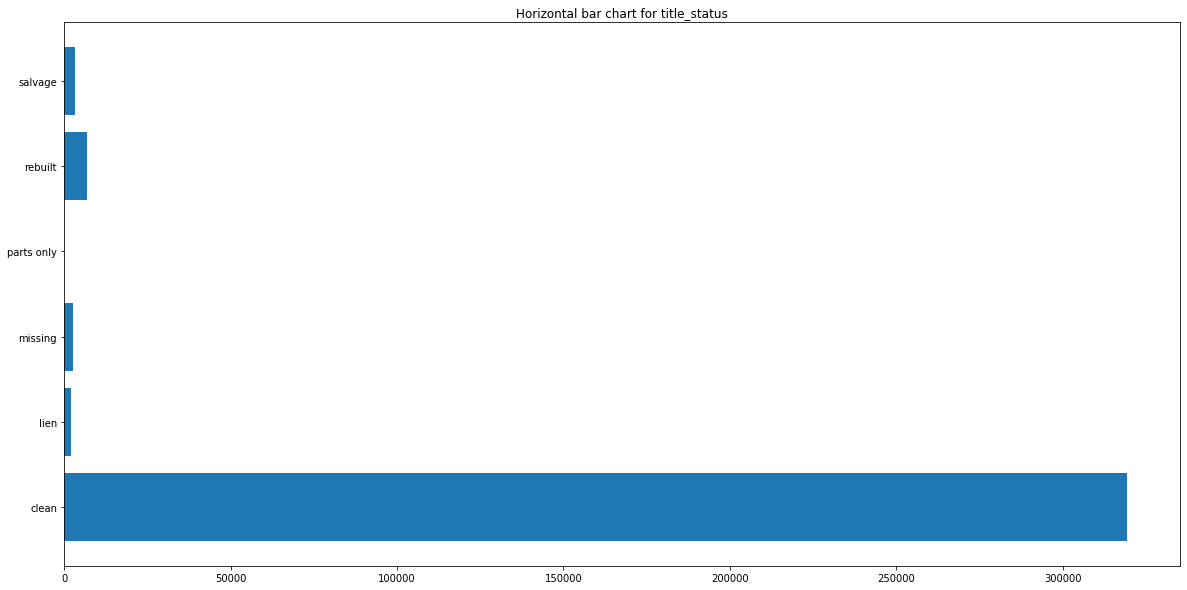

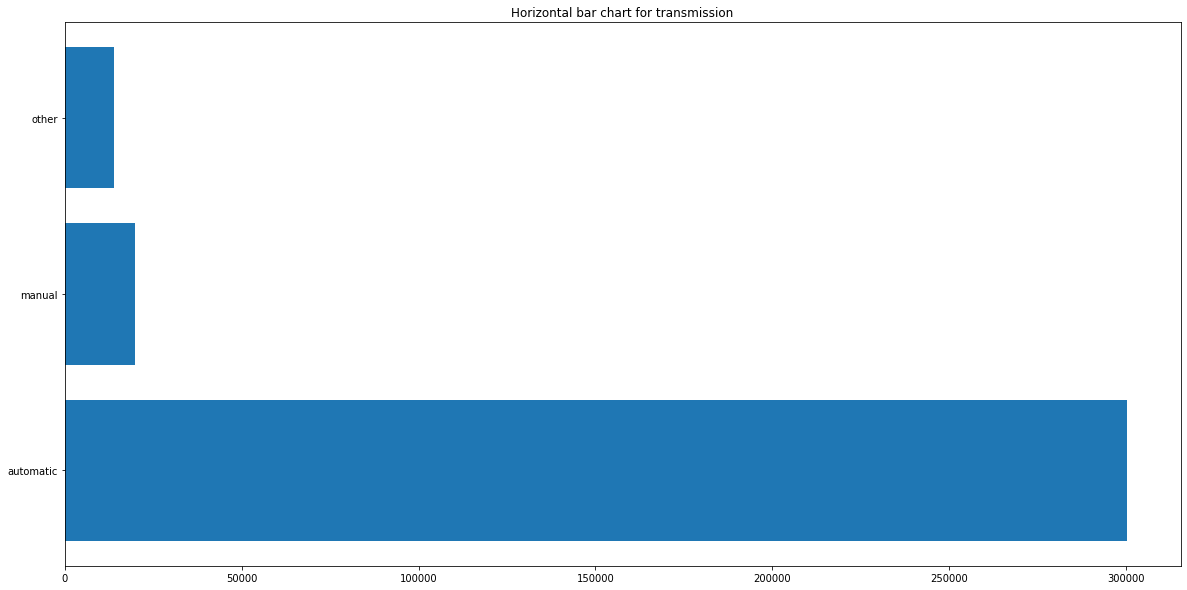

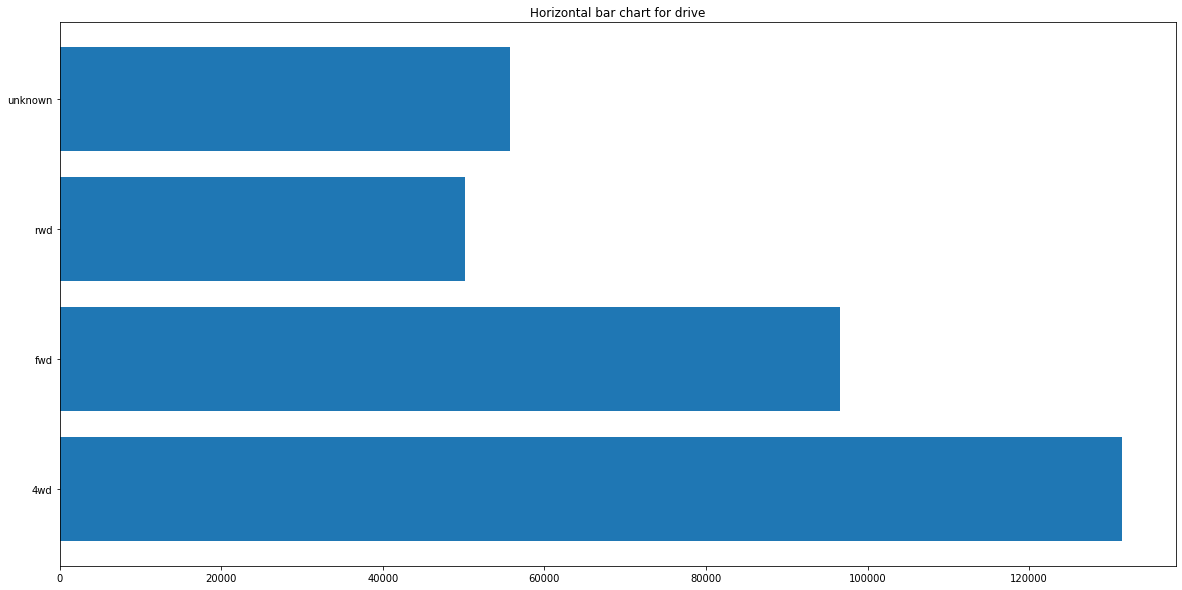

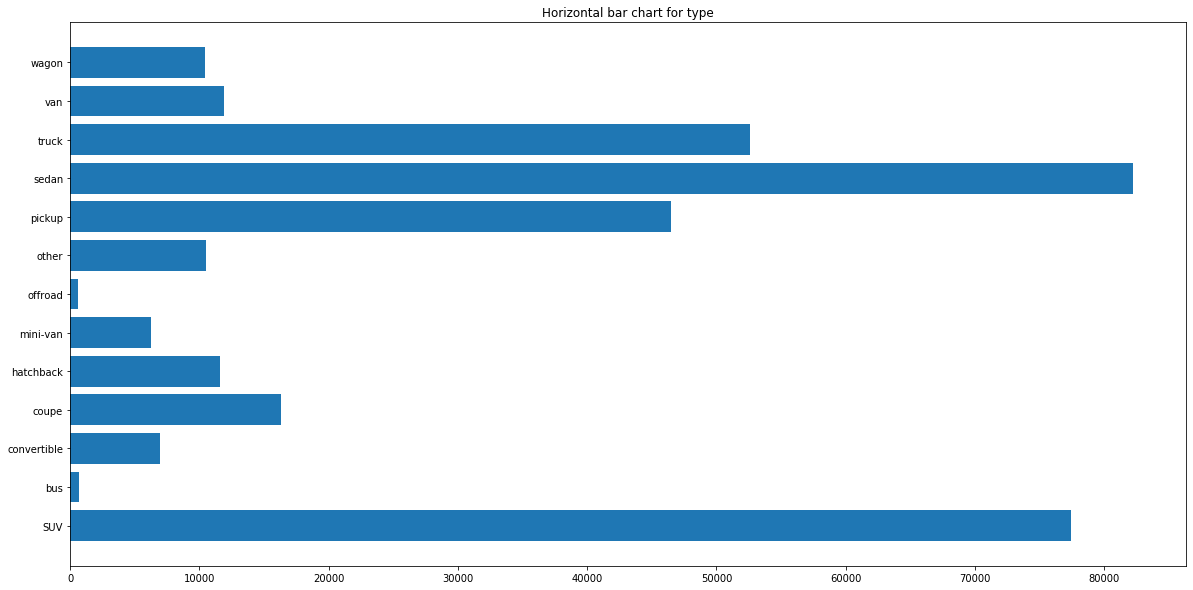

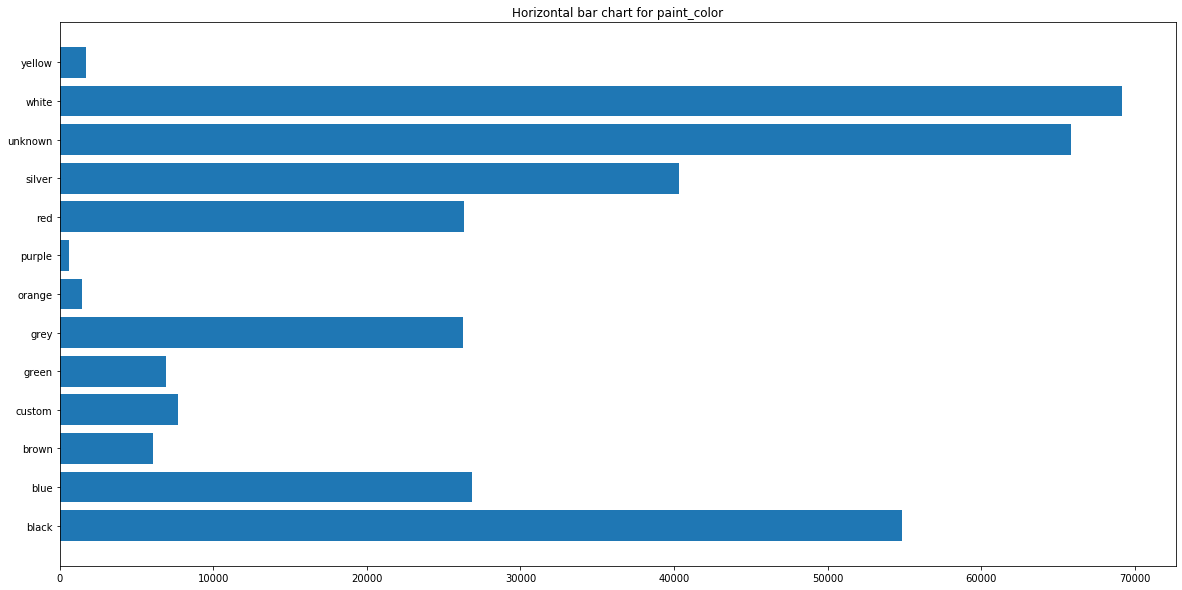

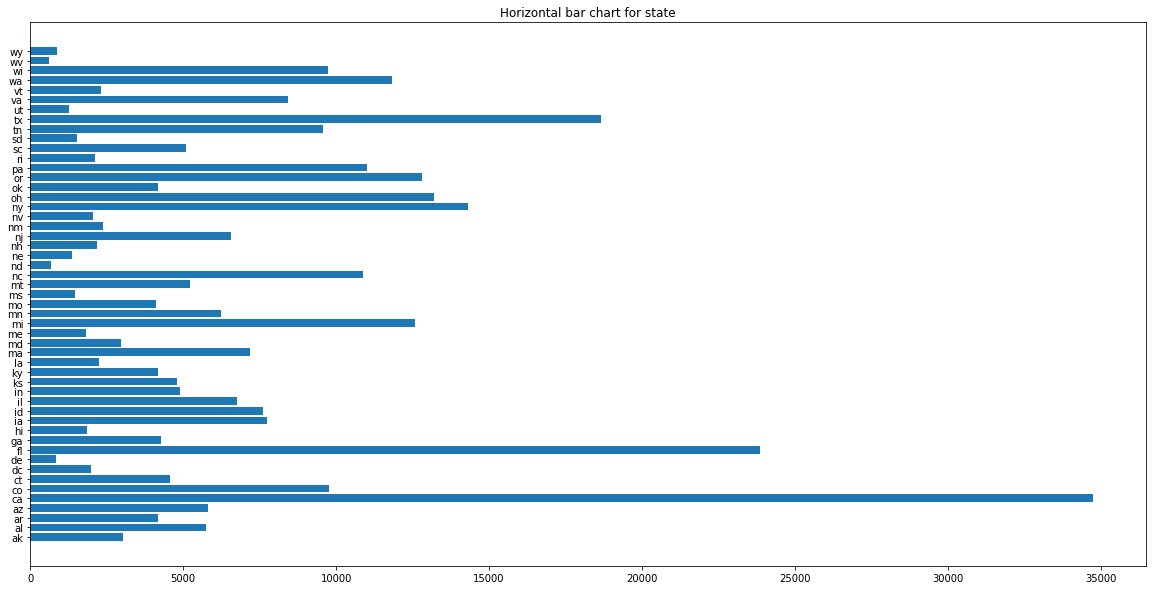

In [123]:
for category in categorical:
    categorical_visual(category)

### Bivariate / Multivariate Analysis

In [124]:
# Creating list to be used with correlation matrix and heatmap
continuous = ['price', 'year', 'odometer', 'lat', 'long', 'price_winsor', 'year_winsor', 'odometer_winsor', 'lat_winsor', 'long_winsor']

In [125]:
cars[continuous].corr()

,price,year,odometer,lat,long,price_winsor,year_winsor,odometer_winsor,lat_winsor,long_winsor
price,1.000000,-0.000487,-0.000557,0.000411,0.000539,0.008233,-0.000443,-0.000771,0.000475,0.000515
year,-0.000487,1.000000,-0.293891,0.007087,-0.032051,0.447102,0.892079,-0.430363,0.000062,-0.025646
odometer,-0.000557,-0.293891,1.000000,-0.011133,0.050499,-0.305917,-0.380569,0.649780,-0.005726,0.044297
lat,0.000411,0.007087,-0.011133,1.000000,-0.173456,0.038483,-0.000372,-0.006255,0.971764,-0.162175
long,0.000539,-0.032051,0.050499,-0.173456,1.000000,-0.153359,-0.049310,0.081604,-0.139379,0.979872
price_winsor,0.008233,0.447102,-0.305917,0.038483,-0.153359,1.000000,0.579860,-0.498352,0.030331,-0.152795
year_winsor,-0.000443,0.892079,-0.380569,-0.000372,-0.049310,0.579860,1.000000,-0.593241,-0.009648,-0.042259
odometer_winsor,-0.000771,-0.430363,0.649780,-0.006255,0.081604,-0.498352,-0.593241,1.000000,0.003102,0.070628
lat_winsor,0.000475,0.000062,-0.005726,0.971764,-0.139379,0.030331,-0.009648,0.003102,1.000000,-0.148123
long_winsor,0.000515,-0.025646,0.044297,-0.162175,0.979872,-0.152795,-0.042259,0.070628,-0.148123,1.000000


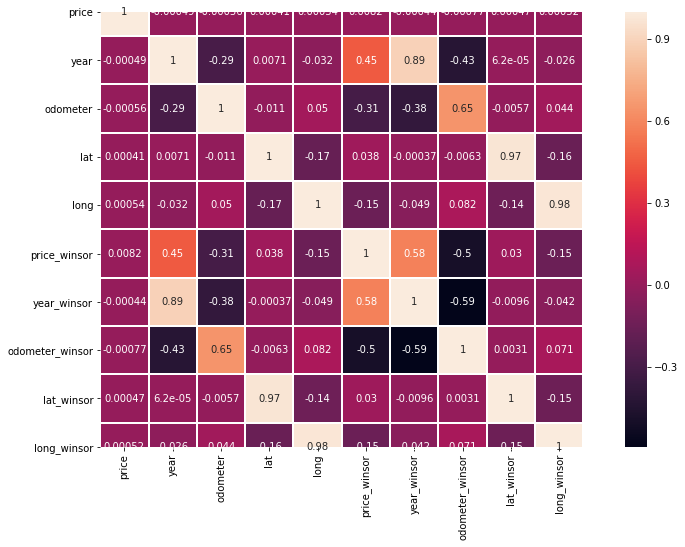

In [126]:
plt.figure(figsize=(15, 8))
sns.heatmap(cars[continuous].corr(), square=True, annot=True, linewidths=1)
plt.show()

In the above correlation matrix and heatmap, we see ```price_winsor``` has a moderately positive relationship with ```year_winsor```, but with ```odometer_winsor``` and ```long_winsor``` the relationship is weak to moderately negative. As for ```lat_winsor```, ```price_winsor``` has no relationship.

### ```manufacturer``` 

In [127]:
cars.groupby('manufacturer').mean()

,price,year,odometer,lat,long,price_winsor,year_winsor,odometer_winsor,lat_winsor,long_winsor
manufacturer,,,,,,,,,,
acura,10204.493546,2009.162111,117831.420653,38.425797,-94.240803,10074.504176,2009.235763,115652.173500,38.406662,-93.771544
alfa-romeo,18141.564706,2010.705882,30917.800000,35.230365,-86.405148,17053.200000,2013.611765,30917.800000,35.234746,-86.400584
aston-martin,62357.750000,2008.750000,30967.416667,37.166017,-103.668567,36704.083333,2008.916667,30967.416667,37.569858,-100.782983
audi,15923.106179,2011.705002,84864.719961,38.802383,-94.703867,14842.521334,2011.722658,83912.077244,38.734734,-94.216663
bmw,14435.996206,2010.544140,87236.382857,37.425784,-96.834289,14066.271096,2010.686866,86601.074336,37.494062,-95.922341
buick,10178.436425,2009.266119,94402.311100,39.051595,-91.211270,10151.338458,2010.223649,92443.154768,38.993144,-91.064962
cadillac,14246.711360,2008.759502,101239.968750,38.080544,-92.891267,13768.206715,2009.631546,97749.603041,38.023599,-92.713056
chevrolet,17505.110063,2009.744219,107248.724598,38.740749,-93.740384,15036.937899,2010.577494,104023.501355,38.632486,-93.402961
chrysler,8954.890481,2010.101842,103396.598772,39.005610,-93.372758,8875.309110,2010.381269,100724.981235,38.947800,-93.122347


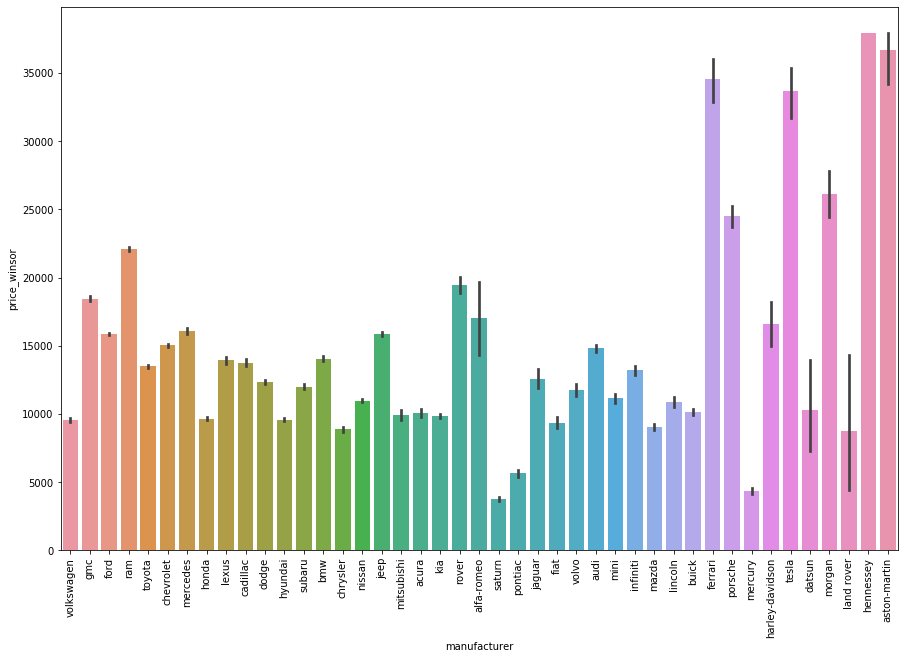

In [128]:
plt.figure(figsize=(15, 10))
sns.barplot(cars['manufacturer'], cars['price_winsor'])
plt.xticks(rotation=90)
plt.show()

Car prices are highest from manufacturers such as Hennessey, Aston-Martin, Tesla and Ferrari.

### ```fuel``` 

In [129]:
cars.groupby('fuel').mean()

,price,year,odometer,lat,long,price_winsor,year_winsor,odometer_winsor,lat_winsor,long_winsor
fuel,,,,,,,,,,
diesel,26812.568743,2010.024734,133214.809668,38.533758,-96.506755,24150.097298,2010.231578,123685.020094,38.454650,-96.289781
electric,21224.562500,2014.356481,45212.826389,36.791820,-104.056061,19029.495370,2014.460648,44055.641204,36.951856,-102.177348
gas,43340.684019,2010.260294,101308.023297,38.701056,-94.221392,12935.675861,2010.715084,98758.399946,38.621395,-93.778550
hybrid,11739.244024,2012.022833,102338.378166,38.114145,-97.191651,11478.787727,2012.038530,99735.792365,38.062285,-96.468863
other,20089.247610,2013.334349,85701.562561,37.648814,-95.649469,19350.672094,2013.541361,84952.573576,37.601030,-95.449046


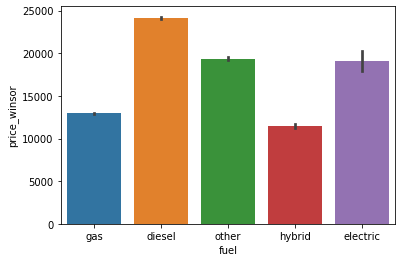

In [130]:
sns.barplot(cars['fuel'], cars['price_winsor'])
plt.show()

Car prices are highest among vehicles that use diesel fuel.

### ```title_status``` 

In [131]:
cars.groupby('title_status').mean()

,price,year,odometer,lat,long,price_winsor,year_winsor,odometer_winsor,lat_winsor,long_winsor
title_status,,,,,,,,,,
clean,41801.180877,2010.344823,104225.273703,38.644542,-94.515547,14250.171492,2010.762655,101146.674230,38.568511,-94.107101
lien,19947.271109,2012.504069,88878.946083,38.993178,-93.458426,18820.059512,2012.675992,84984.777213,38.563249,-92.317756
missing,18292.566926,2010.850945,85882.181683,36.963130,-93.147009,17486.356322,2012.058954,83081.505747,37.030779,-92.140909
parts only,2607.151515,1997.969697,155248.454545,37.794606,-95.917185,2607.151515,2004.333333,130120.848485,37.513148,-94.192852
rebuilt,13516.708442,2011.956484,78567.500580,39.024260,-93.655970,11208.673629,2012.145634,75693.781114,38.881228,-93.174718
salvage,10148.627500,2010.228125,94529.279063,37.887170,-98.753503,9372.068438,2010.599688,91049.229375,37.880597,-98.601853


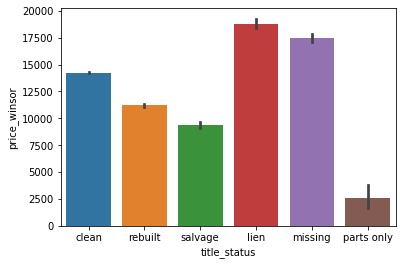

In [132]:
sns.barplot(cars['title_status'], cars['price_winsor'])
plt.show()

Car prices are highest for titles with a lien. 

### ```transmission``` 

In [133]:
cars.groupby('transmission').mean()

,price,year,odometer,lat,long,price_winsor,year_winsor,odometer_winsor,lat_winsor,long_winsor
transmission,,,,,,,,,,
automatic,31610.631138,2010.598949,104126.931470,38.683814,-94.550193,14187.917553,2010.901606,101612.343344,38.606832,-94.135172
manual,192318.051923,2004.893216,116795.378737,38.621300,-96.490847,11688.588043,2007.241606,105903.692948,38.568758,-96.098583
other,18128.741597,2013.775639,67907.247917,37.566173,-91.091572,17859.664680,2013.935579,63691.546826,37.437354,-90.602566


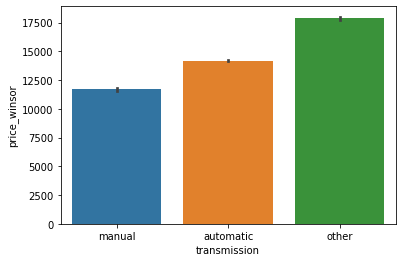

In [134]:
sns.barplot(cars['transmission'], cars['price_winsor'])
plt.show()

Behind other, car prices are highest for automatic transmissions.

### ```type```

In [135]:
cars.groupby('type').mean()

,price,year,odometer,lat,long,price_winsor,year_winsor,odometer_winsor,lat_winsor,long_winsor
type,,,,,,,,,,
SUV,15793.817758,2010.982048,106406.307850,39.034309,-95.032780,13408.626815,2011.070219,104272.570543,38.934881,-94.530511
bus,15454.451761,2008.035222,120439.537519,38.456405,-87.066170,15214.480858,2008.885145,116402.453292,38.498509,-86.802705
convertible,16676.198024,2003.940149,82483.121564,36.186599,-94.349263,13351.803265,2006.443013,79308.367411,36.233371,-94.114048
coupe,23787.085751,2007.516648,82945.035316,36.972105,-94.416594,14061.777880,2009.558024,79008.686743,36.990773,-93.987883
hatchback,317226.149534,2011.675923,88605.478268,38.387885,-95.407649,9447.510348,2011.871507,86782.600466,38.329145,-94.918504
mini-van,9124.979900,2009.794179,123126.555073,38.912719,-91.897919,8976.811063,2009.852549,118924.982955,38.882155,-91.477863
offroad,15280.924837,2003.441176,108813.215686,37.758821,-97.422145,14800.797386,2006.202614,105408.233660,37.591982,-96.552240
other,17573.615815,2012.134232,81208.214828,37.532485,-89.200823,17002.483577,2012.845453,74961.622935,37.486174,-89.079934
pickup,119782.039038,2010.589366,108765.165975,38.460239,-95.540921,20577.134375,2011.017256,105574.865087,38.363135,-95.272756


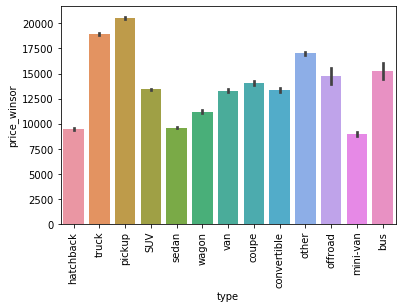

In [136]:
sns.barplot(cars['type'], cars['price_winsor'])
plt.xticks(rotation=90)
plt.show()

Car prices are highest for pickups and trucks.

### ```state``` 

In [137]:
cars.groupby('state').mean()

,price,year,odometer,lat,long,price_winsor,year_winsor,odometer_winsor,lat_winsor,long_winsor
state,,,,,,,,,,
ak,2.020506e+04,2012.897487,67150.873016,61.246188,-149.057808,19713.500661,2013.150132,66490.251984,48.746566,-123.099280
al,1.491117e+04,2011.177321,111396.311270,33.038587,-87.154785,14635.322418,2011.431632,108362.555478,33.038746,-87.154785
ar,1.651012e+04,2011.609820,103845.304431,35.916771,-93.537245,16002.014850,2012.011257,100604.800240,35.929046,-93.749369
az,1.409174e+04,2009.130240,103781.666379,33.325911,-111.399859,13113.514404,2010.060031,100373.879765,33.341713,-111.416929
ca,1.523320e+04,2009.840940,98647.423391,36.440148,-119.112877,14616.848423,2010.433953,95191.690802,36.447698,-119.108379
co,5.472880e+04,2010.500256,104035.582864,39.434883,-104.546108,15758.333709,2010.869017,101025.393666,39.434883,-104.546108
ct,1.406837e+04,2009.638536,105430.886234,41.540363,-73.013804,11494.614423,2010.064884,104364.521701,41.553487,-73.014831
dc,1.198932e+04,2009.940081,105473.632931,38.836549,-77.365645,11657.339879,2010.158610,100385.169184,38.836549,-77.365645
de,1.232091e+04,2008.122912,110359.652745,39.724014,-75.332519,12069.272076,2008.754177,108947.770883,39.724014,-75.332519


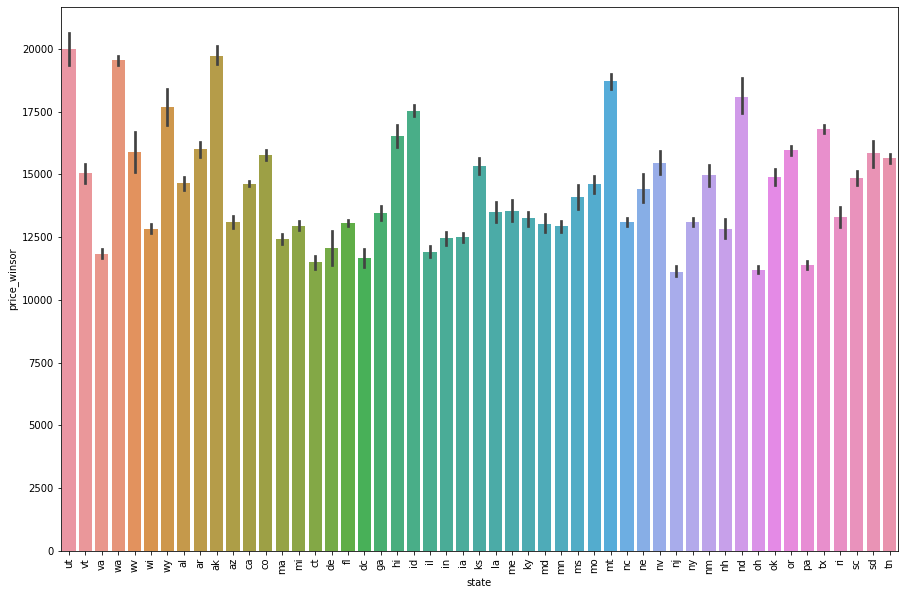

In [138]:
plt.figure(figsize=(15, 10))
sns.barplot(cars['state'], cars['price_winsor'])
plt.xticks(rotation=90)
plt.show()

Car prices are highest in states such as Utah, Alaska, Washington and Montana.

### ```state_region```

The ```state_region_conversion``` function is used to categorize the state into a region within the United States.

In [139]:
def state_region_conversion(state):
    
    if state in ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']:
        return 'NE'
    elif state in ['OH', 'MI', 'IN', 'WI', 'IL', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']:
        return 'MW'
    elif state in ['DE', 'MD', 'VA', 'WV', 'KY', 'NC', 'SC', 'TN', 'GA', 'FL', 'AL', 'MS', 'AR', 'LA', 'TX', 'OK']:
        return 'S'
    else:
        return 'W'

Create a new variable ```cars['state_region']```.

In [140]:
cars['state_region'] = cars['state'].str.upper().apply(state_region_conversion)

In [141]:
cars.groupby('state_region').mean()

,price,year,odometer,lat,long,price_winsor,year_winsor,odometer_winsor,lat_winsor,long_winsor
state_region,,,,,,,,,,
MW,62198.704047,2010.169292,110929.156010,41.643083,-88.943415,12826.043501,2010.484639,107891.047603,41.650875,-88.948696
NE,15475.069421,2009.986377,103180.881141,41.670286,-74.337093,12347.685983,2010.364204,100410.650072,41.680422,-74.381586
S,56961.380157,2010.629509,105413.817499,33.206192,-86.368764,14258.271489,2011.069585,101796.452590,33.216353,-86.379088
W,20458.196362,2010.512893,95802.817865,40.628797,-117.588912,16065.650796,2011.003478,93092.249012,40.350748,-116.175813


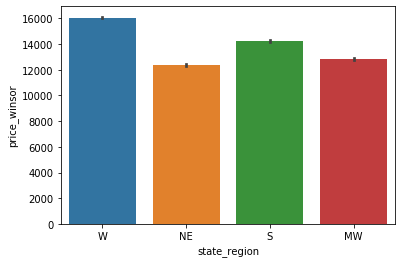

In [142]:
sns.barplot(cars['state_region'], cars['price_winsor'])
plt.show()

Car prices are highest in the western region of the United States.

In [143]:
# Categorical variables one-hot encoding
cars = pd.concat([cars, pd.get_dummies(cars['manufacturer'])], axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['fuel'])], axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['title_status'])], axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['transmission'])], axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['type'])], axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['state_region'])], axis=1)

## Model Creation and Performance Evaluation 

In [144]:
# Variables to drop
variables = ['region', 'price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
             'transmission', 'drive', 'type', 'paint_color', 'description', 'state', 'lat', 'long', 'state_region']

In [145]:
# Independent and dependent variables
X = cars.drop(variables, axis=1)
y = cars['price_winsor']

In [146]:
# Split dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=465)

In [147]:
# Records in training set and test set
print('There are {} records in the training set'.format(X_train.shape[0]))
print('There are {} records in the test set'.format(X_test.shape[0]))

There are 267241 records in the training set
There are 66811 records in the test set


In [148]:
# Linear regression
lr = LinearRegression()

# Cross validation
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)

print(lr_scores.mean())

1.0


In [149]:
# Random forest regression
rf = RandomForestRegressor()

# Cross validation
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)

print(rf_scores.mean())

0.9999999933555113


In [150]:
# KNN regression
knn = KNeighborsRegressor()

# Cross validation
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)

print(knn_scores.mean())

0.9999523238448982


In [151]:
# Fit linear regression model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
# Fit random forest regression model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [153]:
# Fit KNN regression model
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [154]:
# Linear regression predictions
lr_preds_test = lr.predict(X_test)

In [155]:
# Random forest regression predictions
rf_preds_test = rf.predict(X_test)

In [156]:
# KNN regression predictions
knn_preds_test = knn.predict(X_test)

Function to print out summary statistics for each regression model.

In [157]:
def print_stats(model, X_train, X_test, y_train, y_test, y_preds_test):
    print('R-squared of the model on the training set {}'.format(model.score(X_train, y_train)))
    print('Test Set Statistics ----------------------')
    print('R-squared of the model on the test set {}'.format(model.score(X_test, y_test)))
    print('Mean absolute error of the prediction is {}'.format(mean_absolute_error(y_test, y_preds_test)))
    print('Mean squared error of the prediction is {}'.format(mse(y_test, y_preds_test)))
    print('Root mean squared error of the prediction is {}'.format(rmse(y_test, y_preds_test)))

In [158]:
# Linear regression results
print_stats(lr, X_train, X_test, y_train, y_test, lr_preds_test)

R-squared of the model on the training set 1.0
Test Set Statistics ----------------------
R-squared of the model on the test set 1.0
Mean absolute error of the prediction is 8.541990150009114e-11
Mean squared error of the prediction is 1.103137545165706e-20
Root mean squared error of the prediction is 1.0503035490588927e-10


In [159]:
# Random forest regression results
print_stats(rf, X_train, X_test, y_train, y_test, rf_preds_test)

R-squared of the model on the training set 0.9999999990796153
Test Set Statistics ----------------------
R-squared of the model on the test set 0.9999999956440866
Mean absolute error of the prediction is 0.0995000823217689
Mean squared error of the prediction is 0.4312854170720372
Root mean squared error of the prediction is 0.6567232423723385


In [160]:
# KNN regression results
print_stats(knn, X_train, X_test, y_train, y_test, knn_preds_test)

R-squared of the model on the training set 0.9999774064176252
Test Set Statistics ----------------------
R-squared of the model on the test set 0.9999643250165754
Mean absolute error of the prediction is 29.597584230141745
Mean squared error of the prediction is 3532.2327898100616
Root mean squared error of the prediction is 59.43259030035677


## Conclusion

While the Random Forest Regression model and KNN Regression model had very high values for R-squared and low values for mean absolute error, mean squared error and root mean squared error, the Linear Regression model had the lowest. Therefore, I think the Linear Regression model works best on predicting used car price based on the various features.